<a id='Top'></a>
# Applied Economic Analysis: Python Assignment

> ### Aryan Kataria : u232801

## How has change in sea surface temperatures affected the frequency of hurricanes?



<img src = "https://static.scientificamerican.com/blogs/cache/file/D06ACC70-505D-4894-8D32F7520D730809_source.jpg?w=690&h=930&D61239FC-5FBC-4944-8D0DECD76592BCD1.gif">




### Motivation
Climate change is proven to be real through empirical evidence. Over the number of years we have all seen many reports of ice caps melting and sea levels rising. But another intriguing area of interest would be whether climate change also affects natural phenomena/calamities that occur in our world. Then we have to narrow down to which of these phenomena would be affected by climate change. For this project, we consider hurricanes (also known as tropical storms depending on the region) and try to analyze if any correlation exists between temperature change and frequency of hurricanes.



### Method
1. We start off by importing temperature and hurricane data as dataframes. The data in consideration is for the Atlantic Ocean, Pacific Ocean and the South China Sea.
2. Firstly we further clean the data to make our datasets homogenous in terms of the number of years. Time frames in our raw data are not homogenous, some starting around 1850 and some at 1951. The final timeframe in consideration is 1951-2017.
3. Then we provide evidence of increase in surface temperature of these oceans by plotting the average annual temperatures on a graph, further plotting temperature anomalies based on the throughout average from 1951 to 2017.
4. After that we plot the frequency of hurricanes in these different oceans, followed by correlation of their temperatures and respective frequency of hurricanes and showing this correlation on a scatter plot.

### Do we find significant evidence?
The correlation coefficients we find are low in their value and do not reflect statistical significance. But interestingly enough, while the coefficient for the Atlantic Ocean is positive, it is negative for the South China Sea and Western Pacific Ocean. We also see a relatively strong positive correlation for the Central And Eastern Pacific Ocean in our [Analysis and Results](#Analysis-and-Results). These might indicate the potential of further in depth research through different methods.

### Assumptions and Limitations
The hurricane frequency for the South China Sea also includes the Western Pacific Ocean, since they are monitored by the Tokyo Meteorological Agency, and the Central And Eastern Pacific and the Atlantic Ocean is monitored by the US National Oceanic and Atmospheric Administration. In our correlations we correlate the South China Sea temperatures with the hurricane data from the Tokyo Meteorological Agency. Due to the proximity of the Western Pacific Ocean and the South China Sea we assume there would not be such significant difference in their temperatures and would not tamper with our results greatly.

### Data
We find our data from 3 main sources. The hurricane frequency for the Atlantic Ocean and East and Central Pacific Ocean is from the US National Oceanic and Atmospheric Administration's hurricane database [HURDAT2](https://www.nhc.noaa.gov/data/). For the hurricane data on the South China Sea and Western Pacific Ocean, we use Tokyo Meteorological Agency's ["Best Track Data"](https://www.jma.go.jp/jma/jma-eng/jma-center/rsmc-hp-pub-eg/trackarchives.html) for hurricanes.
Our temperature data comes from The Netherlands' Koninklijk Meteorologisch Instituut [ICOADS v2.5 SST](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=coads_sst) database.

### Importing libraries and data

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dfAT = pd.read_csv("atlantic_temperature.csv")
dfAH = pd.read_csv("Atlantic_Hurricanes.csv")
dfPT = pd.read_csv("pacific temperature.csv")
dfEPH = pd.read_csv("Pacific_Hurricanes.csv")
dfSCT = pd.read_csv("south china sea temperatures.csv")
dfWPH = pd.read_csv("western pacific hurricanes.csv")

### Data Cleaning
Our raw temperature data looks like the following:

In [132]:
dfAT.head()

,1849,-999.9,-999.9.1,-999.9.2,-999.9.3,-999.9.4,-999.9.5,27.79999,-999.9.6,-999.9.7,-999.9.8,27.79999.1,-999.9.9
0,1850,25.60001,-999.90000,-999.9,-999.9,-999.90000,-999.9,-999.90000,-999.9,-999.9,-999.9,-999.90000,-999.90000
1,1852,-999.90000,-999.90000,-999.9,-999.9,-999.90000,-999.9,-999.90000,-999.9,-999.9,-999.9,27.79999,27.20001
2,1853,26.39999,25.60001,-999.9,-999.9,-999.90000,-999.9,-999.90000,-999.9,-999.9,-999.9,-999.90000,-999.90000
3,1854,-999.90000,-999.90000,-999.9,-999.9,-999.90000,-999.9,26.89999,-999.9,-999.9,-999.9,-999.90000,-999.90000
4,1856,-999.90000,-999.90000,-999.9,-999.9,28.17999,-999.9,-999.90000,-999.9,-999.9,-999.9,-999.90000,-999.90000


This data has monthly columns and year as the first column. To make it easy to work with, we asssign the columns their respective month headings and use years as index. We also replace the missing values depicted by "-999.90000" with NaN.

In [133]:
# Assigning columns and index
dfAT.columns = ["Year", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dfPT.columns = ["Year", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dfSCT.columns = ["Year", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

dfAT2 = dfAT.set_index('Year', drop=True)
dfAT2 = dfAT2.replace(-999.9000, np.nan)

dfPT2 = dfPT.set_index('Year', drop=True)
dfPT2 = dfPT2.replace(-999.90000, np.nan)

dfSCT2 = dfSCT.set_index('Year', drop=True)
dfSCT2 = dfSCT2.replace(-999.90000, np.nan)


Now our temperature data for each ocean looks like this:

In [134]:
dfAT2.head()

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1850,25.60001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.79999,27.20001
1853,26.39999,25.60001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854,NaN,NaN,NaN,NaN,NaN,NaN,26.89999,NaN,NaN,NaN,NaN,NaN
1856,NaN,NaN,NaN,NaN,28.17999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Values from much older years are missing, but such is not the case for recent years.

In [135]:
dfAT2.tail()

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2014,27.95001,27.14999,27.78000,27.87000,28.06000,27.42999,27.82999,29.00000,29.04001,28.85998,28.70999,28.72000
2015,27.32001,27.10999,27.57001,27.67001,28.45999,27.45001,28.35999,28.85998,29.26001,29.62000,28.48001,28.39999
2016,27.34000,27.44000,27.73001,27.79999,28.57001,28.89999,28.35999,28.82001,29.54001,29.26999,29.01999,28.53000
2017,27.20999,27.48001,27.19000,27.19000,28.35001,28.48001,28.32001,28.51999,29.48999,29.54999,28.85001,28.64999
2018,27.69000,27.12000,26.76999,27.39001,27.70999,27.92001,28.39001,28.51001,28.59000,28.79001,28.78000,NaN


Now we need to find the average temperatures of each year in the three oceans and further creare a list selecting the average temperatures from 1951 to 2017.

In [136]:
# Taking average temperatures from rows and creating subsequent lists for 1951-2017
atavg =  dfAT2.mean(axis=1)
atavg2 = atavg.loc[1951:2017]

ptavg = dfPT2.mean(axis=1)
ptavg2 = ptavg.loc[1951:2017]

sctavg = dfSCT2.mean(axis=1)
sctavg2= sctavg.loc[1951:2017]

Coming to hurricane data, our raw data looks like the following:

In [137]:
dfAH.head()

,Year,Hurricanes
0,1949,16
1,1950,16
2,1951,12
3,1952,11
4,1953,14


The reason for choosing 1951 as a staring year is because hurricane data for the South China Sea and Western Pacific starts from 1951.

In [138]:
dfWPH.head()

,Year,Annual
0,1951,21
1,1952,27
2,1953,23
3,1954,21
4,1955,28


Now we again index the years in the hurricane data and drop the observations of 1949 and 1950 from the Atlantic and Pacific Ocean hurricane data.

In [139]:
#Indexing years and dropping observations
dfAH2 = dfAH.set_index('Year', drop=True)
AH = dfAH2.drop([1949, 1950])

dfEPH2 = dfEPH.set_index('Year', drop=True)
EPH = dfEPH2.drop([1949, 1950])

WPH = dfWPH.set_index('Year', drop=True)

The hurricane data now looks like this:

In [140]:
AH.head()

,Hurricanes
Year,
1951,12
1952,11
1953,14
1954,16
1955,13


### Plotting Temperature Data

The follwing graph plots the trend in the temperatures of the three oceans from 1951 to 2017.

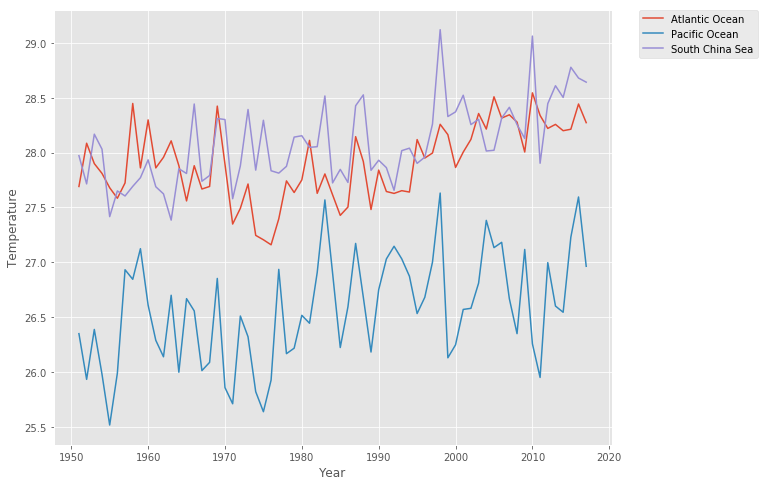

In [168]:
#Here we plot the graph
plt.plot(atavg2, label="Atlantic Ocean")
plt.plot(ptavg2, label="Pacific Ocean")
plt.plot(sctavg2, label ="South China Sea")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.show()


While we do seen an upward trend in the temperatures,to get a clearer picture let's see the trend in temperature anomalies for the same period, using the period average.

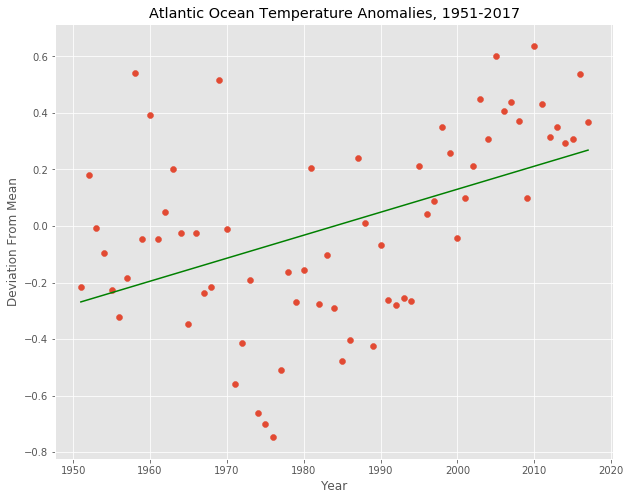

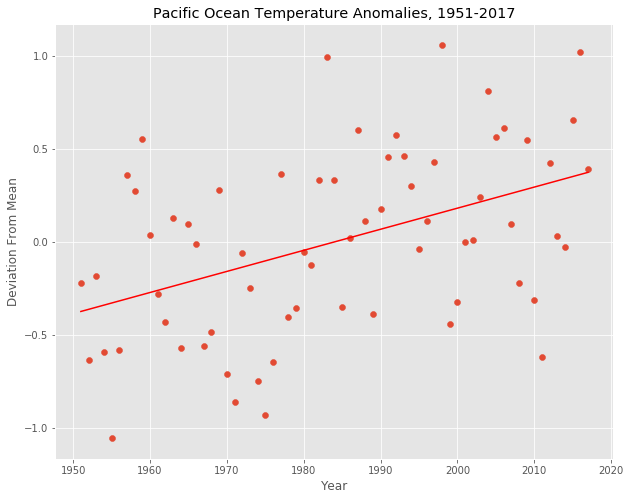

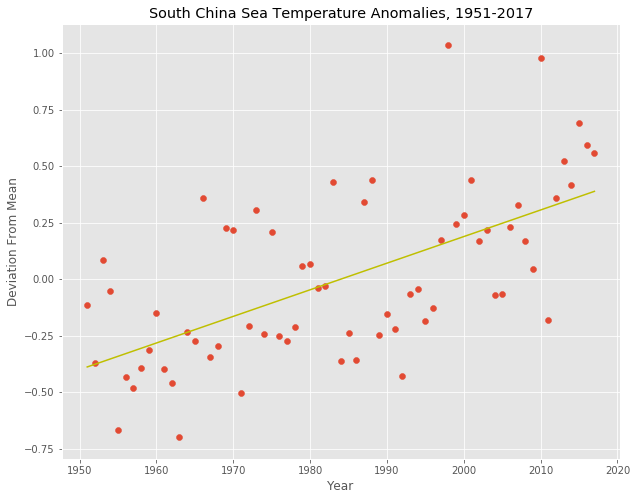

In [169]:
#Creating lists of anomalies
atc = atavg2.loc[1951:2017] - atavg2.mean()
ptc = ptavg2.loc[1951:2017] - ptavg2.mean()
sctp = sctavg2.loc[1951:2017] - sctavg2.mean()

#Plotting temperature anomalies
plt.scatter(atc.index, atc)
plt.title("Atlantic Ocean Temperature Anomalies, 1951-2017")
plt.xlabel("Year")
plt.ylabel("Deviation From Mean")
plt.plot(np.unique(atc.index), np.poly1d(np.polyfit(atc.index, atc, 1))(np.unique(atc.index)), "g-")
plt.show()

plt.scatter(ptc.index, ptc)
plt.title("Pacific Ocean Temperature Anomalies, 1951-2017")
plt.xlabel("Year")
plt.ylabel("Deviation From Mean")
plt.plot(np.unique(ptc.index), np.poly1d(np.polyfit(ptc.index, ptc, 1))(np.unique(ptc.index)), "r-")
plt.show()

plt.scatter(sctp.index, sctp)
plt.title("South China Sea Temperature Anomalies, 1951-2017")
plt.xlabel("Year")
plt.ylabel("Deviation From Mean")
plt.plot(np.unique(sctp.index), np.poly1d(np.polyfit(sctp.index, sctp, 1))(np.unique(sctp.index)), "y-")
plt.show()

These graphs do suggest an upward trend in the surface temperatures of these oceans.

### Hurricane Data

Coming now to our hurricane data. The graphs below show the frequency of hurricanes in the same time period.

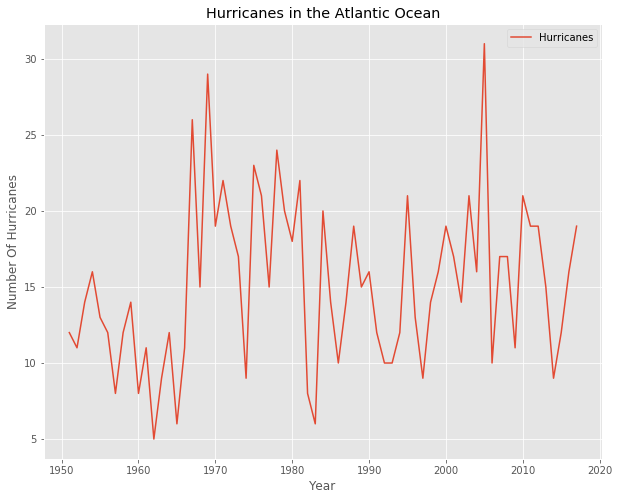

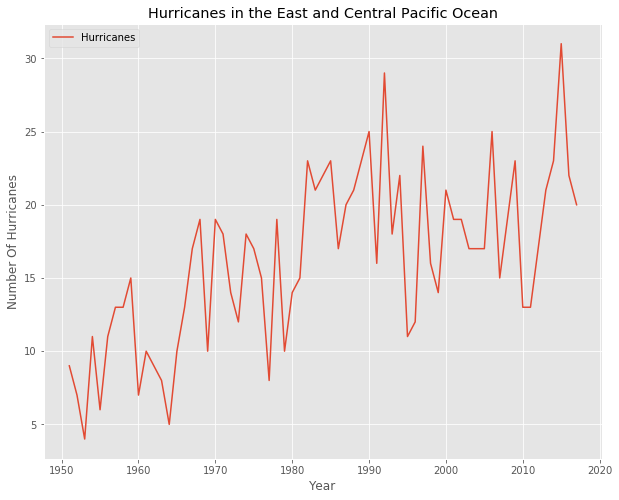

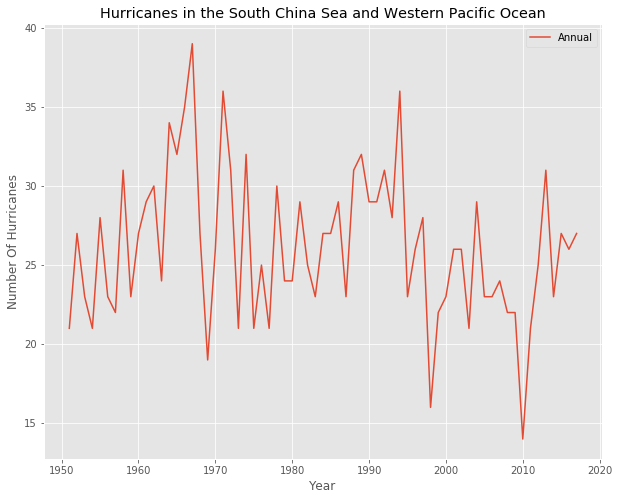

In [143]:
# Plotting frequency of hurricanes
AH.plot()
plt.xlabel("Year")
plt.ylabel("Number Of Hurricanes")
plt.title("Hurricanes in the Atlantic Ocean")
plt.show()

EPH.plot()
plt.xlabel("Year")
plt.ylabel("Number Of Hurricanes")
plt.title("Hurricanes in the East and Central Pacific Ocean")
plt.show()

WPH.plot()
plt.xlabel("Year")
plt.ylabel("Number Of Hurricanes")
plt.title("Hurricanes in the South China Sea and Western Pacific Ocean")
plt.show()

The South China Sea and Western Pacific Ocean hints a downward trend in the frequency of hurricanes, while the East and Central Pacific shows a strong upward trend.

### Analysis and Results

For the final part, we analyze and calculate the correlation coefficient for each ocean's temperature and their respective frequency of hurricanes. For further illustration we plot this correlation on a scatter plot to see if there is any visible strength of these correlations.

[[1.         0.13796239]
 [0.13796239 1.        ]]


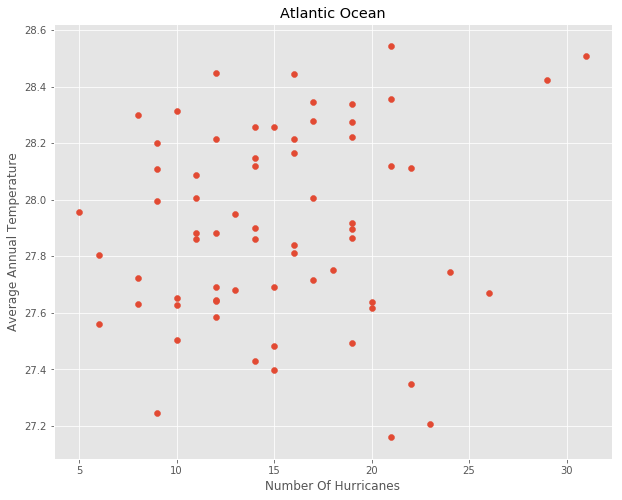

In [144]:
#Correlation for the Atlantic Ocean
print(np.corrcoef(AH.loc[:, "Hurricanes"], atavg2))

plt.style.use('ggplot')

plt.scatter(AH.loc[:, "Hurricanes"], atavg2)
plt.xlabel("Number Of Hurricanes")
plt.ylabel("Average Annual Temperature")
plt.title("Atlantic Ocean")
plt.show()


The correlation coefficient for the Atlantic Ocean is approximately 0.14. This is not a strong result.

[[1.         0.39492263]
 [0.39492263 1.        ]]


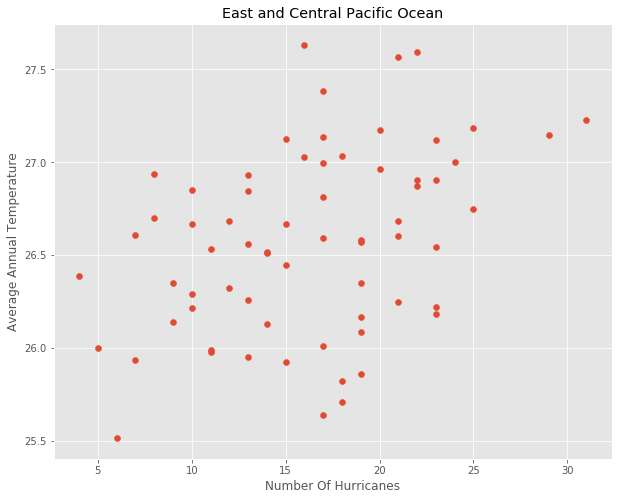

In [145]:
#Correlation for the East and Central Pacific Ocean
print(np.corrcoef(EPH.loc[:, "Hurricanes"], ptavg2))

plt.style.use('ggplot')

plt.scatter(EPH.loc[:, "Hurricanes"], ptavg2)
plt.xlabel("Number Of Hurricanes")
plt.ylabel("Average Annual Temperature")
plt.title("East and Central Pacific Ocean")
plt.show()


The correlation coefficent for the East and Central Pacific Ocean is approximately 0.4. This is not too strong, but the scatter plot suggests some strength in this positive coefficent.

[[ 1.         -0.40820599]
 [-0.40820599  1.        ]]


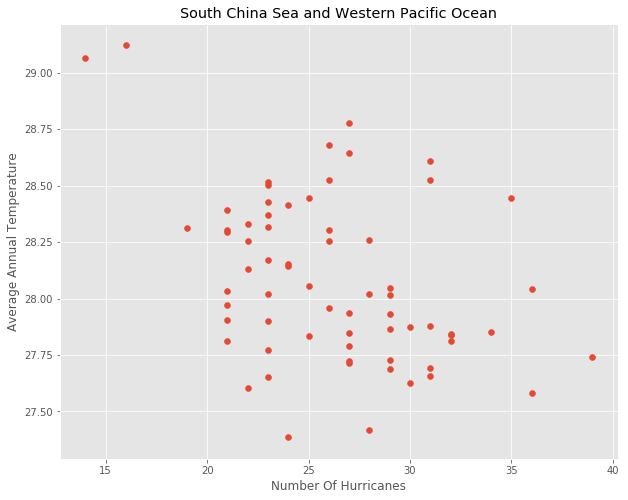

In [146]:
#Correlation for the South China Sea and Western Pacific Ocean
print(np.corrcoef(WPH.loc[:, "Annual"], sctavg2))

plt.style.use('ggplot')

plt.scatter(WPH.loc[:, "Annual"], sctavg2)
plt.xlabel("Number Of Hurricanes")
plt.ylabel("Average Annual Temperature")
plt.title("South China Sea and Western Pacific Ocean")
plt.show()

Interestingly enough, analysis for the South China Sea and Western Pacific Ocean depicts a correlation coefficient of approximatelely -0.41. This may be due to the [Assumptions and Limitations](#Assumptions-and-Limitations) we discussed earlier, or due to other natural factors.

[Back To Top](#Top)